In [1]:
class kernelDensityEstimate:
    def __init__(self,kernel,bandwidth):
        self.kernel = kernel
        self.bandwidth = bandwidth
    def kernel(self,x):
        if self.kernel == 'gaussian':
            return 1/np.sqrt(2*np.pi*self.bandwidth**2)*np.exp(-1/(2*self.bandwidth**2)*x**2)
        if self.kernel == 'epanechnikov':
            t = x/self.bandwidth
            if abs(t)<=1:
                return 3/4*(1-(x/self.bandwidth)**2)
            else: 
                return 0
    def fit(self,x):
        self.x = np.array(x)
        self.n = x.shape[0]
    def score_samples(self,x0):
        result = []
        for j in x0:
            f = 1/self.n*sum([kernelDensityEstimate.kernel(self,j-i) for i in self.x])
            result.append(f)
        return np.array(result,dtype=float)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), #6
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis] #14
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

- epanechnikov

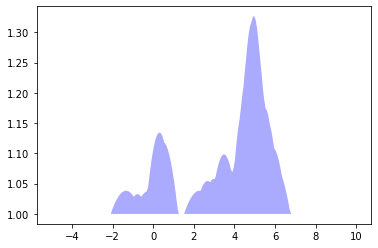

In [3]:
kde = kernelDensityEstimate(kernel='epanechnikov',bandwidth=0.75)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
fig,ax = plt.subplots()
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')

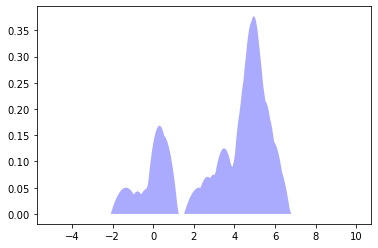

In [4]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='epanechnikov', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
fig,ax = plt.subplots()
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')

- gaussian kernel

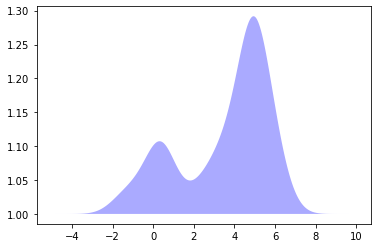

In [5]:
kde = kernelDensityEstimate(kernel='gaussian',bandwidth=0.75)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
fig,ax = plt.subplots()
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')

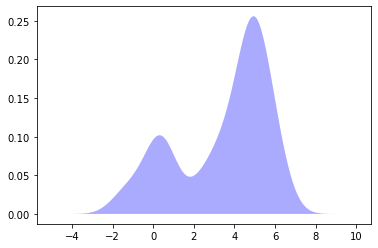

In [6]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
fig,ax = plt.subplots()
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')